In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/recentyears.csv')
df

,年,月,南半球平均温度,北半球平均温度,热带平均温度,南温带平均温度,北温带平均温度,澳大利亚平均温度,美国平均温度,中国平均温度,印尼平均温度
0,1899,1,22.009579,9.365654,21.927674,17.630000,2.803077,17.741000,1.568667,-1.707529,25.862500
1,1899,2,22.262368,11.469580,23.084116,18.794600,5.104442,20.234500,0.130667,1.557353,25.758000
2,1899,3,22.323000,15.066198,24.859233,17.960200,9.341365,18.914000,4.161667,6.888647,25.947000
3,1899,4,21.079053,19.147469,25.557837,15.182000,14.933654,16.258000,10.742000,13.200118,26.101500
4,1899,5,19.389053,22.827704,25.845907,12.175400,20.099712,12.804500,14.221000,19.062412,26.653500
...,...,...,...,...,...,...,...,...,...,...,...
1481,2022,6,21.267140,29.284586,24.293534,10.665363,23.970267,15.742980,20.533595,18.480379,25.945530
1482,2022,7,20.628030,23.915871,28.604921,11.492332,28.225847,15.515358,23.995589,21.267973,26.066153
1483,2022,8,19.954941,28.666738,25.046134,14.578219,24.382067,17.064545,23.134584,20.095077,26.991987
1484,2022,9,19.289010,25.246634,28.805304,13.482711,22.502592,22.441567,19.256957,14.681354,26.029269


In [5]:
new_df1 = df.loc[df['年']>=2019]
# new_df = new_df.loc[new_df['年']<=2016].reset_index(drop=True)
new_df1 = new_df1[['年', '南半球平均温度', '北半球平均温度']]
mean_temp = new_df1[['南半球平均温度', '北半球平均温度']].mean(axis=1).to_numpy()
dt_temp_df1 = new_df1[['年']]
dt_temp_df1['mean_temp'] = mean_temp
dt_temp1 = pd.pivot_table(dt_temp_df1, values="mean_temp",index=["年"])
dt_temp1

C:\Users\Ty Zhang\AppData\Local\Temp\ipykernel_22440\2045795803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_temp_df1['mean_temp'] = mean_temp


,mean_temp
年,
2019,21.144402
2020,21.025887
2021,21.070186
2022,21.253817


In [8]:
new_df2 = df.loc[df['年']>=2015]
new_df2 = new_df2.loc[new_df2['年']<=2018].reset_index(drop=True)
new_df2 = new_df2[['年', '南半球平均温度', '北半球平均温度']]
mean_temp = new_df2[['南半球平均温度', '北半球平均温度']].mean(axis=1).to_numpy()
dt_temp_df2 = new_df2[['年']]
dt_temp_df2['mean_temp'] = mean_temp
dt_temp2 = pd.pivot_table(dt_temp_df2, values="mean_temp",index=["年"])
dt_temp2

C:\Users\Ty Zhang\AppData\Local\Temp\ipykernel_22440\4049870673.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_temp_df2['mean_temp'] = mean_temp


,mean_temp
年,
2015,20.674617
2016,20.729685
2017,20.923179
2018,20.910010


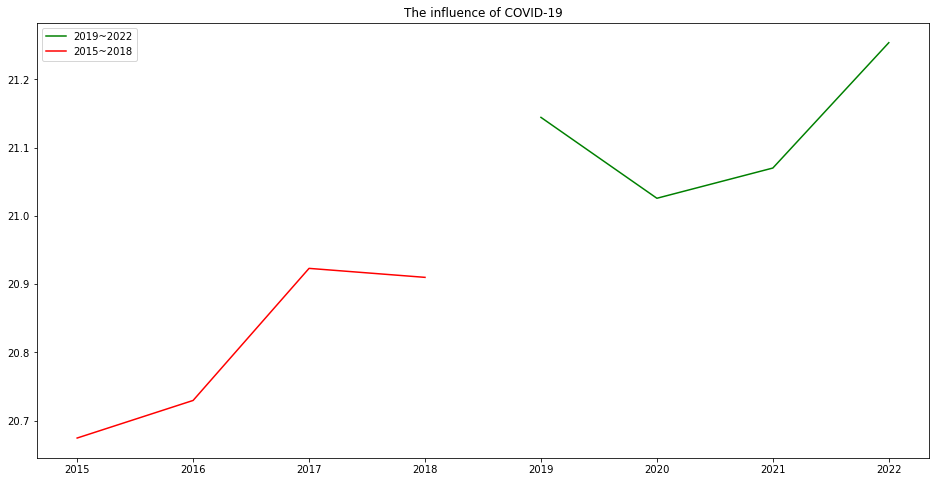

In [16]:
x1 = dt_temp1.index
x2 = dt_temp2.index
y1 = dt_temp1['mean_temp'].to_numpy()
y2 = dt_temp2['mean_temp'].to_numpy()
plt.figure(figsize=(16, 8))

plt.plot(x1, y1, color='g', label='2019~2022')
plt.plot(x2, y2, color='r', label='2015~2018')
plt.legend()
plt.title("The influence of COVID-19")
plt.show()